## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.260425  0.626255 -0.270118  1.355175  0.666085  1.565059
1  1.000807  0.362846 -1.255273  0.461780  0.331130  1.366626
2 -1.354812  1.598434 -0.528740  1.294197 -0.512162 -0.242572
3 -1.560350 -1.069686  0.825265  1.575394  1.019901  0.140625
4 -0.493448  1.528767 -0.011492  0.169960 -0.607709  0.275015


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9980510	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9878244	total: 47.2ms	remaining: 23.6s
2:	learn: 0.9748055	total: 47.6ms	remaining: 15.8s
3:	learn: 0.9642338	total: 48ms	remaining: 11.9s
4:	learn: 0.9550702	total: 48.4ms	remaining: 9.63s
5:	learn: 0.9437055	total: 48.8ms	remaining: 8.08s
6:	learn: 0.9333506	total: 49.1ms	remaining: 6.97s
7:	learn: 0.9248318	total: 49.5ms	remaining: 6.14s
8:	learn: 0.9143727	total: 49.9ms	remaining: 5.49s
9:	learn: 0.9024423	total: 50.3ms	remaining: 4.98s
10:	learn: 0.8928327	total: 50.7ms	remaining: 4.56s
11:	learn: 0.8825322	total: 51ms	remaining: 4.2s
12:	learn: 0.8725075	total: 51.4ms	remaining: 3.9s
13:	learn: 0.8628745	total: 51.7ms	remaining: 3.64s
14:	learn: 0.8549808	total: 52ms	remaining: 3.42s
15:	learn: 0.8449949	total: 52.4ms	remaining: 3.22s
16:	learn: 0.8362607	total: 52.7ms	remaining: 3.05s
17:	learn: 0.8268664	total: 53.1ms	remaining: 2.9s
18:	learn: 0.8178453	total: 53.4ms	remaining: 2.76s
1

200:	learn: 0.1735439	total: 120ms	remaining: 476ms
201:	learn: 0.1720973	total: 120ms	remaining: 475ms
202:	learn: 0.1708984	total: 121ms	remaining: 474ms
203:	learn: 0.1697480	total: 121ms	remaining: 472ms
204:	learn: 0.1685204	total: 121ms	remaining: 471ms
205:	learn: 0.1673561	total: 122ms	remaining: 470ms
206:	learn: 0.1659894	total: 122ms	remaining: 468ms
207:	learn: 0.1647570	total: 123ms	remaining: 467ms
208:	learn: 0.1636379	total: 123ms	remaining: 465ms
209:	learn: 0.1624529	total: 123ms	remaining: 464ms
210:	learn: 0.1612499	total: 124ms	remaining: 462ms
211:	learn: 0.1602619	total: 124ms	remaining: 461ms
212:	learn: 0.1592127	total: 124ms	remaining: 459ms
213:	learn: 0.1579471	total: 125ms	remaining: 458ms
214:	learn: 0.1571269	total: 125ms	remaining: 456ms
215:	learn: 0.1558418	total: 125ms	remaining: 455ms
216:	learn: 0.1546326	total: 126ms	remaining: 453ms
217:	learn: 0.1535075	total: 126ms	remaining: 452ms
218:	learn: 0.1522882	total: 126ms	remaining: 450ms
219:	learn: 

474:	learn: 0.0419673	total: 220ms	remaining: 244ms
475:	learn: 0.0416911	total: 221ms	remaining: 243ms
476:	learn: 0.0415349	total: 221ms	remaining: 243ms
477:	learn: 0.0412638	total: 222ms	remaining: 242ms
478:	learn: 0.0411110	total: 222ms	remaining: 241ms
479:	learn: 0.0407605	total: 222ms	remaining: 241ms
480:	learn: 0.0406113	total: 223ms	remaining: 240ms
481:	learn: 0.0403277	total: 223ms	remaining: 240ms
482:	learn: 0.0401010	total: 223ms	remaining: 239ms
483:	learn: 0.0398247	total: 224ms	remaining: 239ms
484:	learn: 0.0395458	total: 224ms	remaining: 238ms
485:	learn: 0.0392125	total: 225ms	remaining: 238ms
486:	learn: 0.0390705	total: 225ms	remaining: 237ms
487:	learn: 0.0389310	total: 225ms	remaining: 236ms
488:	learn: 0.0386657	total: 226ms	remaining: 236ms
489:	learn: 0.0384527	total: 226ms	remaining: 235ms
490:	learn: 0.0381322	total: 226ms	remaining: 235ms
491:	learn: 0.0378753	total: 227ms	remaining: 234ms
492:	learn: 0.0376080	total: 227ms	remaining: 234ms
493:	learn: 

744:	learn: 0.0133252	total: 318ms	remaining: 109ms
745:	learn: 0.0132710	total: 319ms	remaining: 109ms
746:	learn: 0.0132044	total: 319ms	remaining: 108ms
747:	learn: 0.0131418	total: 320ms	remaining: 108ms
748:	learn: 0.0130823	total: 320ms	remaining: 107ms
749:	learn: 0.0130099	total: 321ms	remaining: 107ms
750:	learn: 0.0129447	total: 321ms	remaining: 106ms
751:	learn: 0.0128807	total: 321ms	remaining: 106ms
752:	learn: 0.0128263	total: 322ms	remaining: 106ms
753:	learn: 0.0127505	total: 322ms	remaining: 105ms
754:	learn: 0.0126854	total: 322ms	remaining: 105ms
755:	learn: 0.0126280	total: 323ms	remaining: 104ms
756:	learn: 0.0125646	total: 323ms	remaining: 104ms
757:	learn: 0.0124914	total: 323ms	remaining: 103ms
758:	learn: 0.0124269	total: 324ms	remaining: 103ms
759:	learn: 0.0123639	total: 324ms	remaining: 102ms
760:	learn: 0.0123073	total: 324ms	remaining: 102ms
761:	learn: 0.0122521	total: 325ms	remaining: 101ms
762:	learn: 0.0121812	total: 325ms	remaining: 101ms
763:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

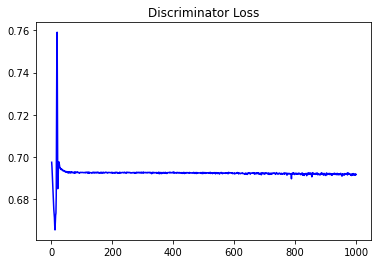

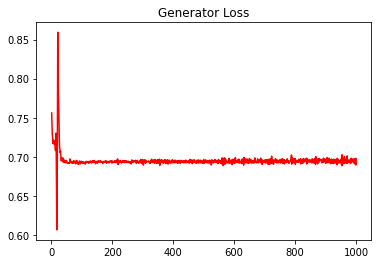

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11025643546163783


#### Sanity Checks 

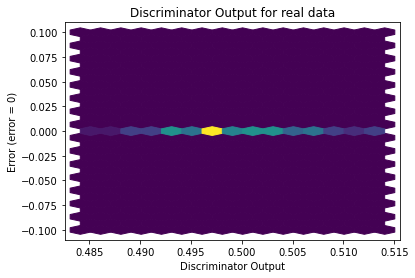

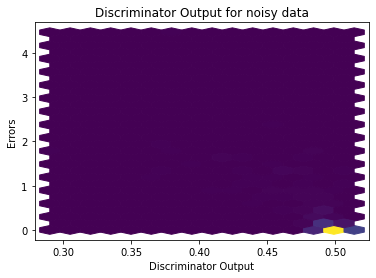

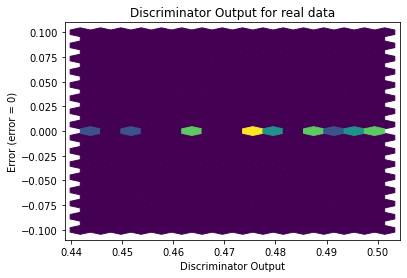

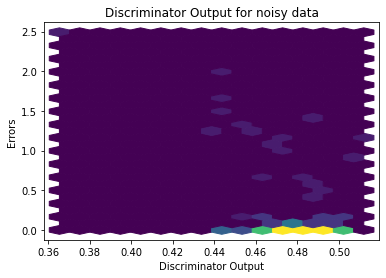

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


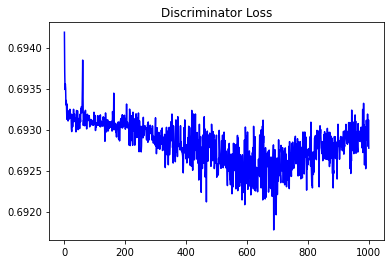

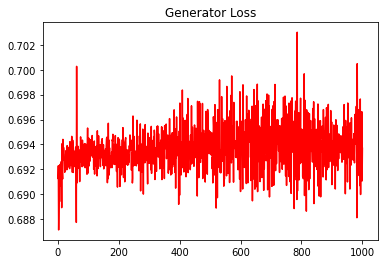

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08891121103044708


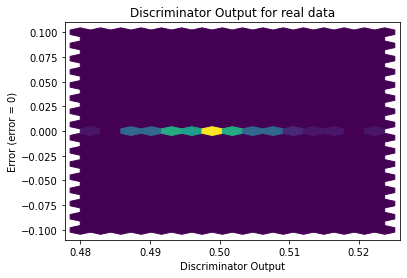

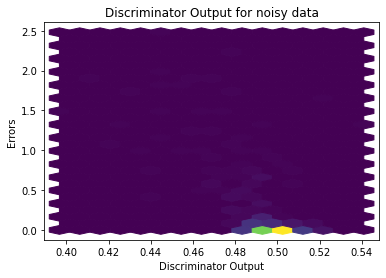

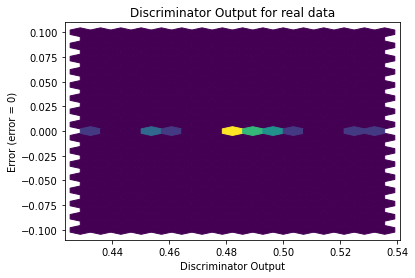

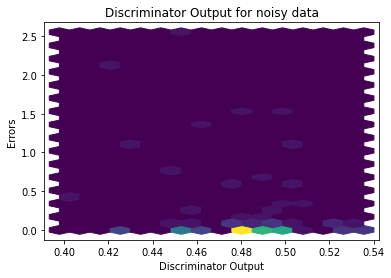

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0958]], device='cuda:0', requires_grad=True)
